<a href="https://colab.research.google.com/github/BubuDavid/Fundamentos-de-Procesamiento-Digital-de-Imagenes/blob/main/tareas/tarea4/Tarea4_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para ver el notebook completo sin interrupciones del formato PDF, puedes ir al siguiente link:
https://colab.research.google.com/drive/1_vTKGx94yAf0HoPUiMCd4bWX6uveu8rf?usp=sharing

# Imports

In [ ]:
# Importando librerías
import cv2 # Para manejar imágenes
import matplotlib.pyplot as plt # Para visualizar las imágenes (Se puede hacer de otra manera con una librería de google pero meh, este está bueno)
import numpy as np # Para operar matrices de manera sencilla

# Funciones Auxiliares

In [ ]:
# Transformación Negativa
def imcomplement(img):
    return np.abs(255 - img)

In [ ]:
# Credits: https://www.nzfaruqui.com/contrast-stretching-in-image-processing-using-matlab/
def imadjust(img,lim_in = [0, 1], lim_out = [0, 1], gamma=1, plot = False):
    c, d = lim_in
    a, b = lim_out
    # Normalización para que esto funcione
    img_cp = img.copy()
    if np.max(img_cp) > 1:
        img_cp = img_cp / np.max(img_cp)

    # Básicamente esto es lo que hace imadjust ☝ ver la fuente para mayor información
    adj = (((img_cp - a) / (b - a)) ** gamma) * (d - c) + c
    # Regresando a las dimensiones originales
    adj = np.int64(adj / np.max(adj) * 255)

    # Grafica la función
    if plot:
        x = np.linspace(0, 1, 1000)
        y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
        plt.plot(x,y, c='g')
        plt.title(f'Función adjust con a={a}, b={b}, c={c}, d={d}, gamma={gamma}')
    return adj

In [ ]:
def show_img(img, size = (7, 7), schema = [1,1], is_gray = False, info = False):
    fig, axs = plt.subplots(*schema, figsize=size)
    if is_gray:
        axs.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        axs.imshow(img)
    axs.axis("off")

    if info:
        print(f"Imagen de dimensiones: {img.shape}, con un total de {img.size} pixeles")

In [ ]:
def show_imgs_row(imgs, size = (10,10), is_gray = False, info = False, titles = None):
    schema = (1, len(imgs))
    options = {}
    if is_gray:
        options["cmap"] = "gray"
        options["vmin"] = 0
        options["vmax"] = 255

    fig, axs = plt.subplots(*schema, figsize=size)

    for index in range(len(imgs)):
        axs[index].imshow(imgs[index], **options)
        axs[index].axis("off")
        if titles:
            axs[index].set_title(titles[index])

In [ ]:
def read_img(img_name):
    img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
    show_img(img, is_gray = True, info = True)
    return img

In [ ]:
# For binarize imgs
def binarize(img, max_val):
    return (img >= max_val) * 255

# Código de tarea 4

# 1. (2 puntos) Usando la imagen Fig0303(a).tif , haga lo siguiente:


Imagen de dimensiones: (1164, 984), con un total de 1145376 pixeles


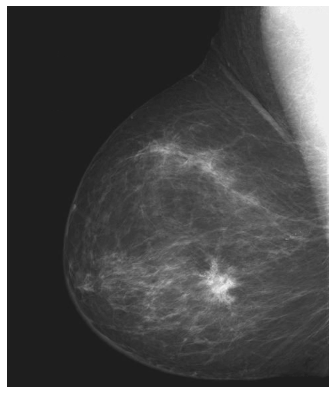

In [ ]:
img1 = read_img("Fig0303(a).tif")

## a. Usando la función imcomplement, calcule el negativo de la imagen

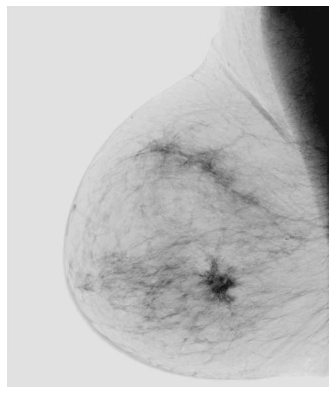

In [ ]:
img1_negative = imcomplement(img1)
show_img(img1_negative, is_gray = True)

## b. Usando la función imadjust, expanda las intensidades entre 0.5 y 0.75

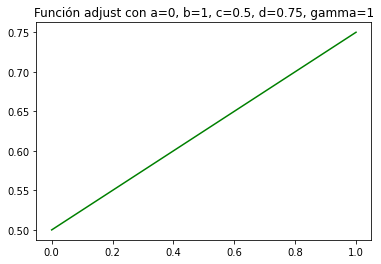

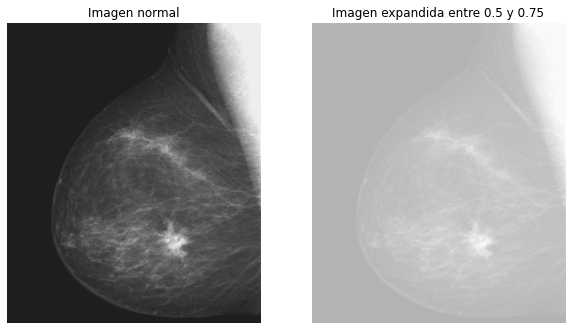

In [ ]:
img1_adj1 = imadjust(img1,lim_in = [0.5, 0.75], plot = True)
show_imgs_row(
    [img1, img1_adj1], 
    is_gray = True,
    titles = [
        "Imagen normal",
        "Imagen expandida entre 0.5 y 0.75"
    ]
)

## c. Usando la función imadjust, aplique una transformación gamma con gamma=2

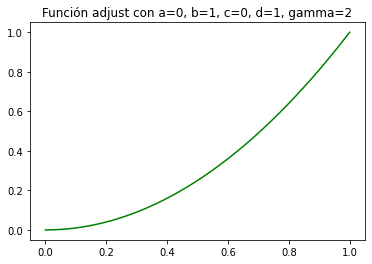

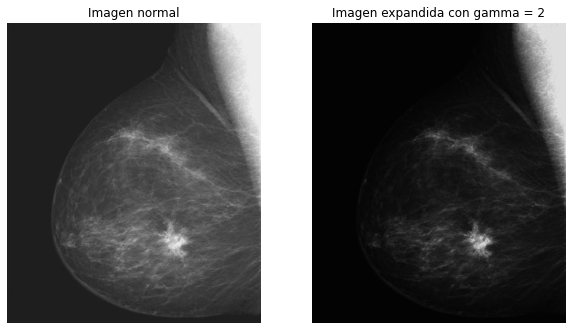

In [ ]:
img1_adj2 = imadjust(img1, gamma = 2, plot = True)
show_imgs_row(
    [img1, img1_adj2], 
    is_gray = True,
    titles = [
        "Imagen normal",
        "Imagen expandida con gamma = 2"
    ]
)

## d. Usando la función imadjust, aplique una transformación gamma con gamma=0.5

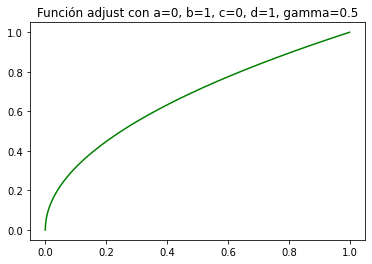

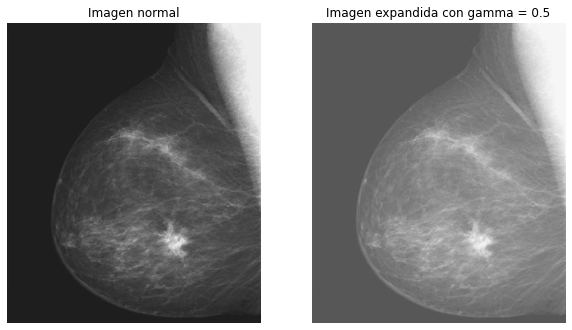

In [ ]:
img1_adj3 = imadjust(img1, gamma = 0.5, plot = True)
show_imgs_row(
    [img1, img1_adj3], 
    is_gray = True,
    titles = [
        "Imagen normal",
        "Imagen expandida con gamma = 0.5"
    ]
)

## ¿Cuál de las transfromaciones anteriores le parece a usted una buena transfromación para visualizar más facilmente la lesión tumoral?

In [ ]:
# Vamos a tratarlas de comparar entre sí
imgs1 = [img1, img1_negative, img1_adj1, img1_adj2, img1_adj3,]
titles1 = [
    "normal",
    "negativa",
    f"expandida entre 0.5 y 0.75",
    f"expandida con gamma = 2",
    f"expandida con gamma = 0.5",
]

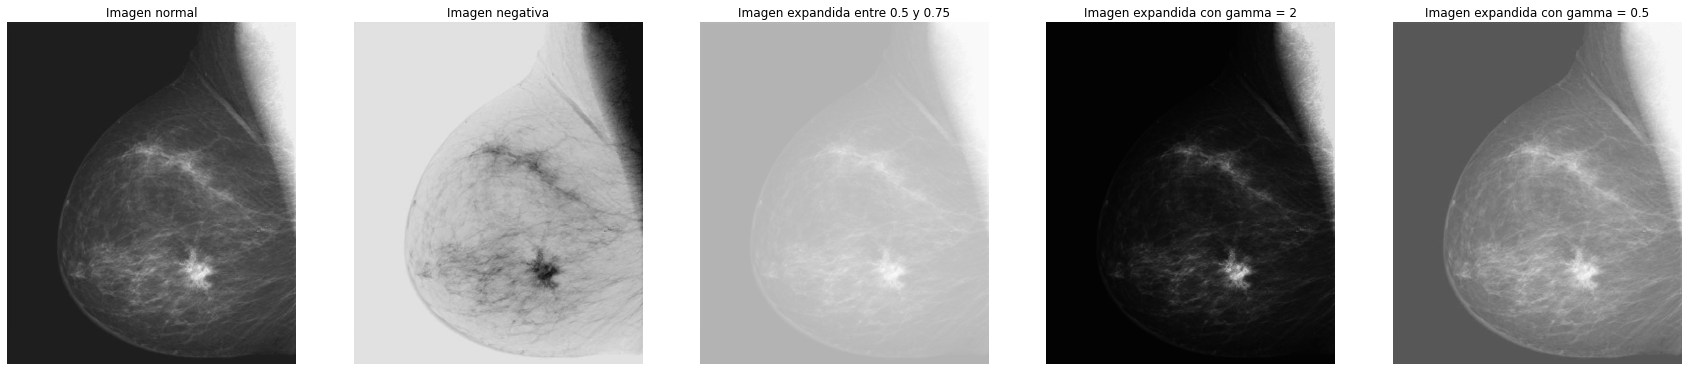

In [ ]:
# Comparación
fig, ax = plt.subplots(1, 5, figsize = (30, 30))
for index, img in enumerate(imgs1):
    ax[index].imshow(img, cmap = "gray", vmin = 0, vmax = 255)
    ax[index].axis("off")
    ax[index].set_title(f"Imagen {titles1[index]}")

Considero que la negativa y la expandida con gamma = 2.

# 2. Usando la imagen Fig0306(a).tif, usando las funciones imcomplement o imadjust, busque una transfromación de intensidades que permita observar de mejor manera el esqueleto del paciente. Reporte que transformación eligió

Imagen de dimensiones: (1641, 1026), con un total de 1683666 pixeles


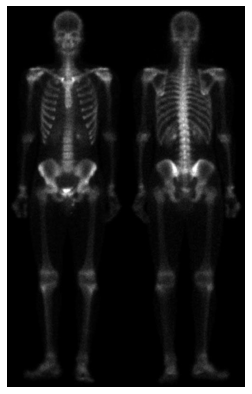

In [ ]:
# Leer imagen
img2 = read_img("Fig0306(a).tif")

In [ ]:
# Voy a probar todas las anteriores y compararlas en una sola figura
less_than_1 = 0.5
greater_than_1 = 2
a, b = 0.5, 0.75
img2_negative = imcomplement(img2)
img2_adj1 = imadjust(img2, [a, b])
img2_adj2 = imadjust(img2, gamma = greater_than_1)
img2_adj3 = imadjust(img2, gamma = less_than_1)
imgs2 = [img2, img2_negative, img2_adj1, img2_adj2, img2_adj3]
titles2 = [
    "normal",
    "negativa",
    f"expandida entre {a} y {b}",
    f"expandida con gamma = {greater_than_1}",
    f"expandida con gamma = {less_than_1}",
]

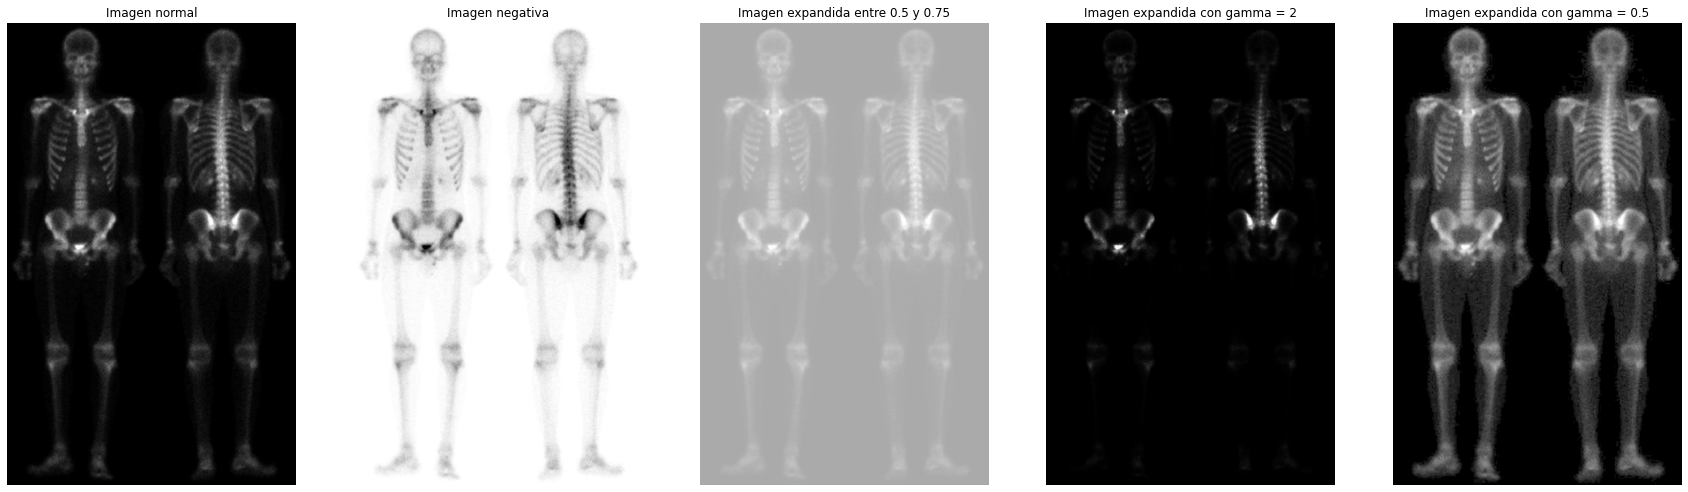

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (30, 30))
for index, img in enumerate(imgs2):
    ax[index].imshow(img, cmap = "gray", vmin = 0, vmax = 255)
    ax[index].axis("off")
    ax[index].set_title(f"Imagen {titles2[index]}")

Propongo que se puede ver mejor el esqueleto con la imagen negativa y con la imagen expandida con valores de gamma menores a 1, voy a intentar más valores con gamma menor a 1 a ver cuál es mejor

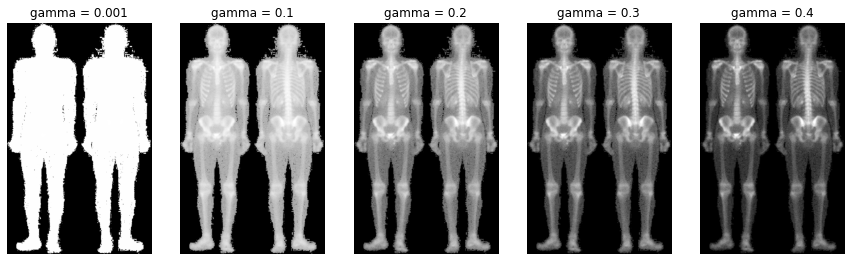

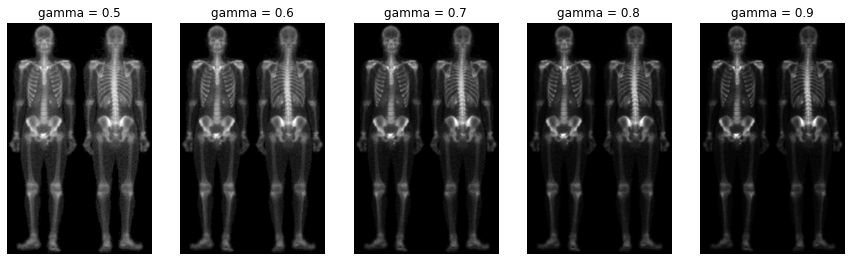

In [ ]:
gamma_values = [[0.001, 0.1, 0.2, 0.3, 0.4], [0.5, 0.6, 0.7, 0.8, 0.9]]
for n_row, row in enumerate(gamma_values):
    fig, ax = plt.subplots(1, 5, figsize = (15, 15))
    for n_gamma, gamma in enumerate(row):
        img2_adj = imadjust(img2, gamma = gamma)
        ax[n_gamma].imshow(img2_adj, cmap = "gray", vmin = 0, vmax = 255)
        ax[n_gamma].axis("off")
        ax[n_gamma].set_title(f"gamma = {gamma}")

De la figura anterior podemos ver que con la gamma que mejor se alcanza a ver el esqueleto sería con la imagen negativa o con gamma = 0.6, 0.7 o 0.8

# 3. Usando la imagen Fig0306(a).tif:

## a. aplique una transformación de intensidades que genere una imagen binaria (0 o 255, solo alguno de esos dos valores), de tal manera que el 255 esté localizado lo mejor posible en tejido oseo.

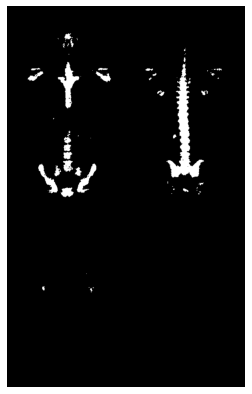

In [ ]:
img2_binary1 = binarize(img2, 100)
show_img(img2_binary1, is_gray = True)

Voy a jugar con algunos valores para el max_val (El threshold para el cual los pixeles serán 1 u 0) de la función en el siguiente código

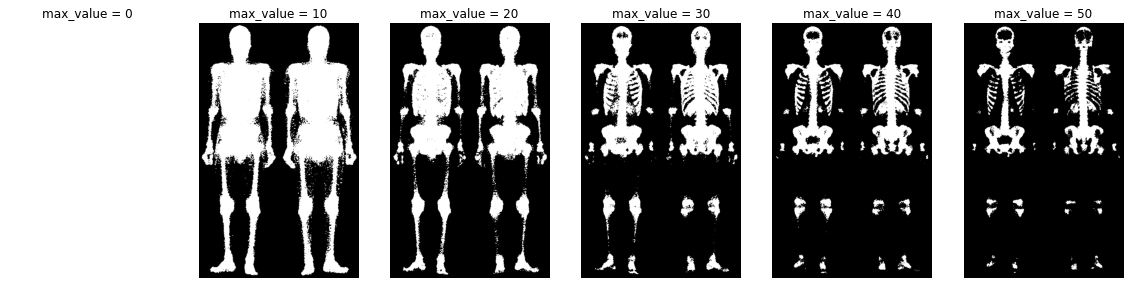

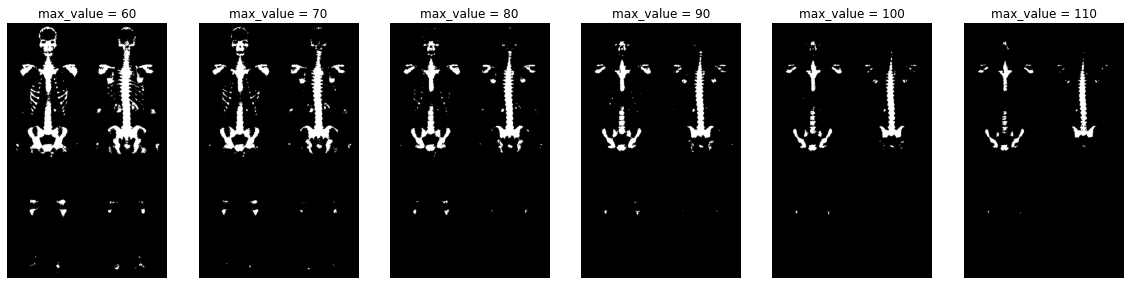

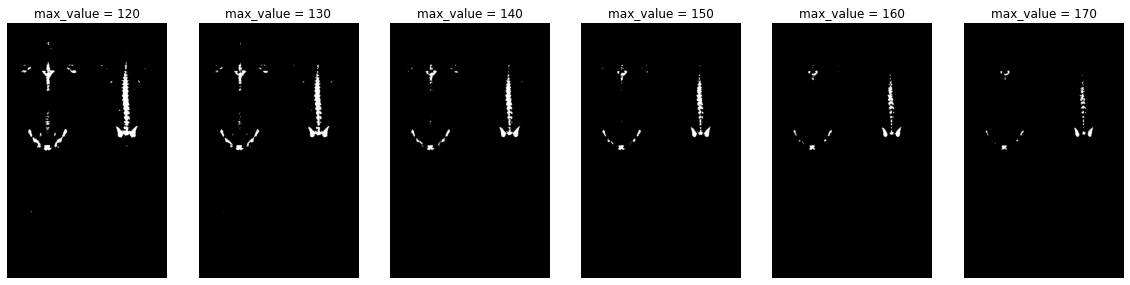

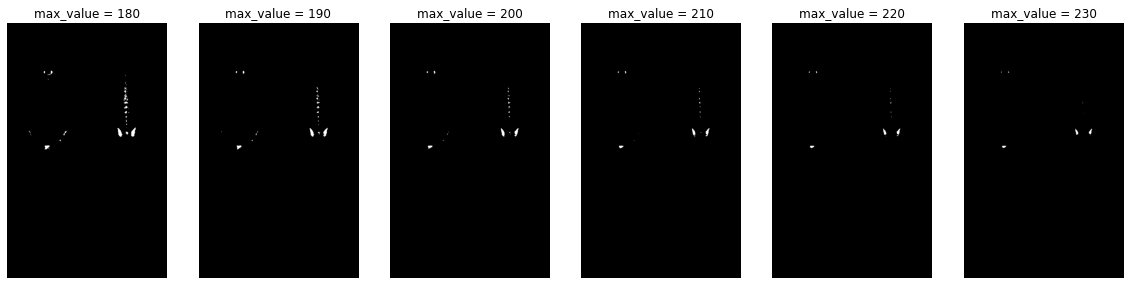

In [ ]:
max_vals2 = [i for i in range(0, 255, 10)]
row = 0
cols = 6
size = 20
img2_binaries = []
fig, ax = plt.subplots(1, cols, figsize = (size, size))
for index, max_val in enumerate(max_vals2[:-2]):
    if index % cols == 0 and index:
        fig, ax = plt.subplots(1, cols, figsize = (size, size))
        row = 0
    img2_binary = binarize(img2, max_val)
    img2_binaries.append(img2_binary.copy())
    ax[row].imshow(img2_binary, cmap = "gray", vmin = 0, vmax = 255)
    ax[row].axis("off")
    ax[row].set_title(f"max_value = {max_val}")
    row += 1

Me interesan los valores 40, 50 y 60, vamos a comparar con la imagen original

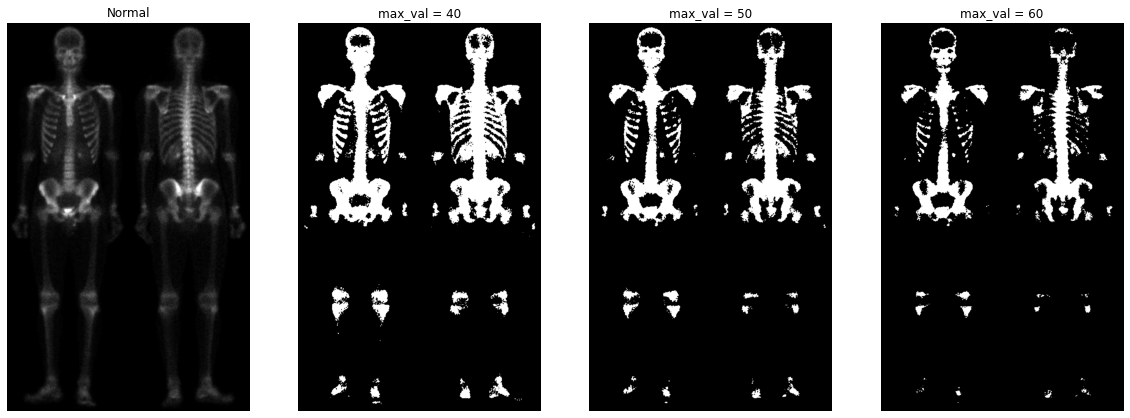

In [ ]:
show_imgs_row(
    [img2, img2_binaries[4], img2_binaries[5], img2_binaries[6]], 
    size = (20, 20), 
    is_gray = True, 
    titles = [
        "Normal",
        "max_val = 40",
        "max_val = 50",
        "max_val = 60",
    ]
)

## b. reporte la transformación elegida y el resultado obtenido
En mi opinión el valor óptimo para ver la estructura ósea es el max_val = 50.

# 4. Programe una función que se llame ImEscala, que reciba una imagen y los valores minf y maxf. La función debe escalar linealmente la imagen recibida y regresar una nueva imagen formada por numeros del tipo double, de tal manera que el valor más bajo de intensidad de la imagen original vaya a dar al valor minf y el valor más alto de intensidad vaya a dar al valor maxf. Sugerencia, para encontrar el valor mínimo de la imagen de entrada puede usar los comandos min(min(ImEnt)) o min(ImEnt(:)), max para el máximo.


**Explicación del algoritmo:** Queremos escalar linealmente números (el valor de nuestros pixeles) dados en un rango de A a B, a otros números en un rango de C a D, concentrémonos en un pixel `p` por el momento, en nuestro caso A es el valor mínimo de nuestros pixeles en la imagen, y B es le valor máximo, asímismo, C es el valor de nuestro minf y D es el valor de nuestro maxf. Para ello primero recorramos el rango A-B al origen, eso podemos hacerlo si restamos el valor de cada pixel `p - A`.

Ahora necesitamos escalar el valor de nuestro pixel por la división de los tamaños de nuestros rangos, en este caso `(C-D)/(B-A)` por lo tanto podemos hacer `(p-A)*(D-C)/(B-A)` y ahora solo falta recorrer nuestro punto p al comienzo del rango C-D. Y estaría lista la ecuación:

```
q = (p-A)*(D-C)/(B-A) + C
```

Fuentes: http://learnwebgl.brown37.net/08_projections/projections_mapping.html

In [ ]:
# La explicación viene arriba y fue sacada con ayuda de: http://learnwebgl.brown37.net/08_projections/projections_mapping.html
def ImEscala(img, minf, maxf):
    a, b = np.min(img), np.max(img)
    scale = (maxf - minf)/(b - a)
    offset = -a*scale + minf
    rescaled = img*scale + offset
    return rescaled

# 5. Usando la función de la pregunta anterior, obtenga una imagen llamada ImT1 a partir de la imagen Fig0310(a).tif cuyo valor mínimo sea 0 y el valor máximo sea 255. Utilice la función imshow para mostrar el resultado, repórtelo.

Imagen de dimensiones: (1000, 683), con un total de 683000 pixeles
El valor mínimo para esta imagen es: 0 y el valor máximo es: 255


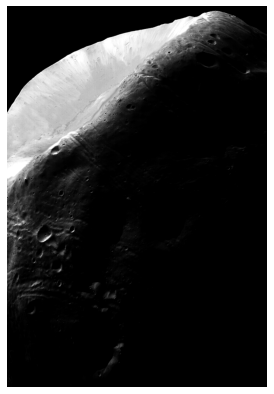

In [ ]:
img3 = read_img("Fig0310(a).tif")
print(f"El valor mínimo para esta imagen es: {np.min(img3)} y el valor máximo es: {np.max(img3)}")

La imagen ya tiene los valores que nos pide reportar en la primera parte del problema, así que no va a cambiar en nada cuando la pasemos a la transformación, será como tener una transformación identidad.

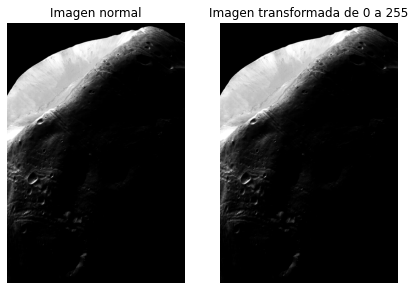

In [ ]:
ImT1 = ImEscala(img3, 0, 255)
show_imgs_row(
    [img3, ImT1],
    is_gray = True,
    size = (7, 7),
    titles = [
        "Imagen normal",
        "Imagen transformada de 0 a 255"
    ]
)

Como podemos observar, son exactamente la misma imagen porque la transformación fue la transformación identidad.

## Ahora haga lo mismo para obtener la imagen ImT2 pero esta vez el valor mínimo será 0 y el máximo será 1, vuelva a mostar con inshow y reporte. Nuevamente muestre la imagen ImT1 con imshow pero esta vez use el comando imshow(ImT1,[]), compare esta imagen deplegada con el depliegue de ImT2. ¿Que puede cocluir con estos experimentos?

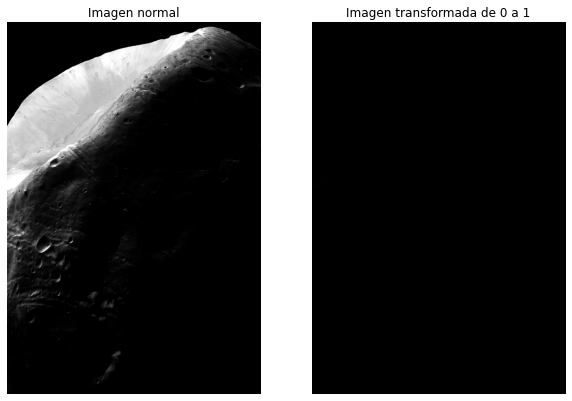

In [ ]:
ImT2 = ImEscala(img3, 0, 1)
show_imgs_row(
    [img3, ImT2],
    is_gray = True,
    size = (10, 10),
    titles = [
        "Imagen normal",
        "Imagen transformada de 0 a 1"
    ]
)

La imagen que vemos aquí se ve todo negro puesto que estamos tomando una función que solo despliega imágenes de 0-255, tengo que modificar un poco la función:

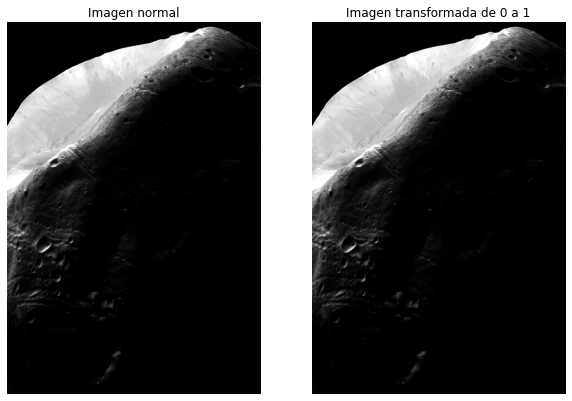

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10, 10))

ax[0].imshow(img3, cmap = "gray", vmin = 0, vmax = 255)
ax[0].set_title("Imagen normal")
ax[1].imshow(ImT2, cmap = "gray", vmin = 0, vmax = 1)
ax[1].set_title("Imagen transformada de 0 a 1")
ax[0].axis("off")
ax[1].axis("off")
plt.show()

Y como podemos ver la imagen es igual a la anterior, pero ahora está en un rango diferente. Esto es el equivalente al imshow(img, []) que nos pedía en el último inciso del ejercicio.